In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset 
data = pd.read_csv("tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
data.shape

(244, 7)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


Exploratory Data Analysis

In [7]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

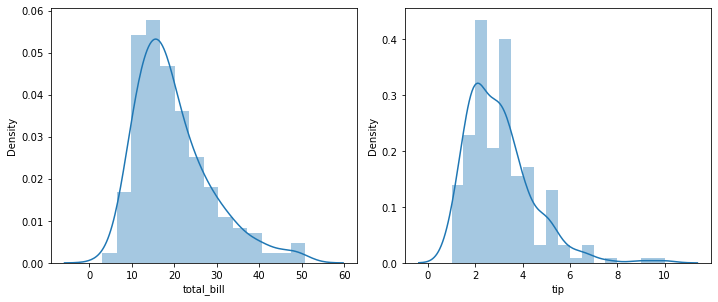

In [8]:
plt.subplots(figsize=(15, 8))

for i, col in enumerate(['total_bill', 'tip']):
    plt.subplot(2,3, i+1)
    sb.distplot(data[col])
    
plt.tight_layout()
plt.show()

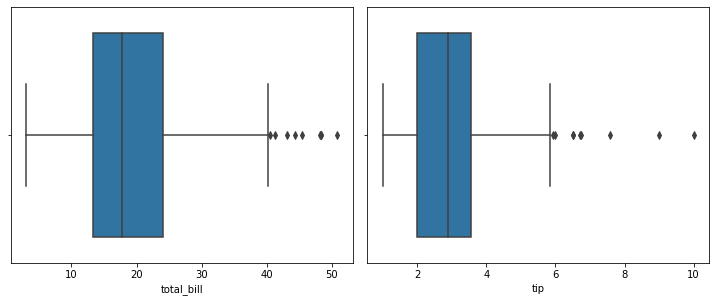

In [9]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(['total_bill', 'tip']):
  plt.subplot(2,3, i + 1)
  sb.boxplot(data[col])
plt.tight_layout()
plt.show()

In [10]:
data.shape, data[(data['total_bill']<45) & (data['tip']<7)].shape

((244, 7), (238, 7))

In [13]:
data = data[(data['total_bill']<45) & (data['tip']<7)]

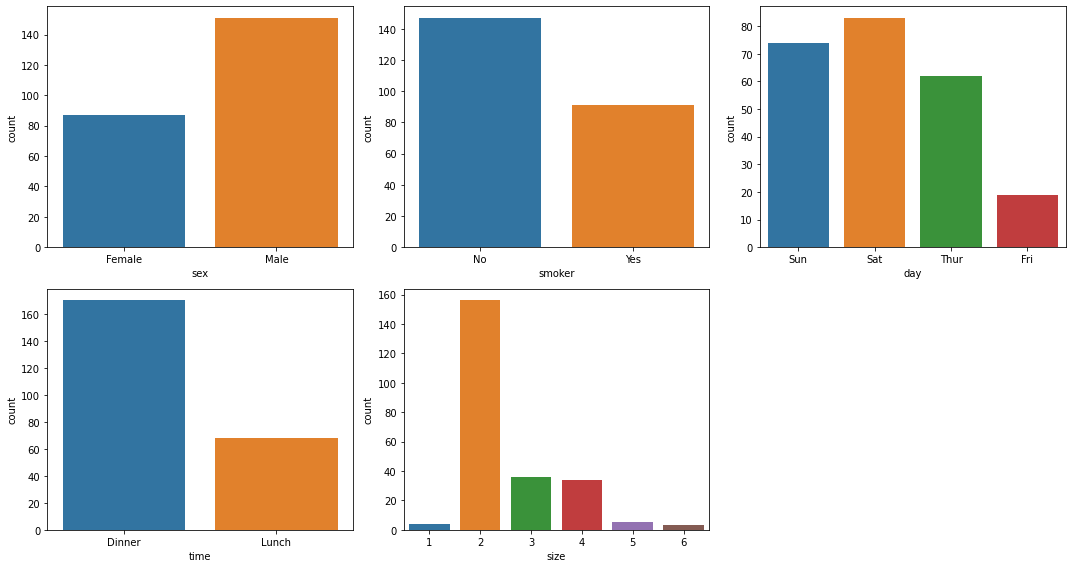

In [14]:
feat = data.loc[:,'sex':'size'].columns

plt.subplots(figsize=(15,8))
for i, col in enumerate(feat):
  plt.subplot(2,3, i + 1)
  sb.countplot(data[col])
plt.tight_layout()
plt.show()

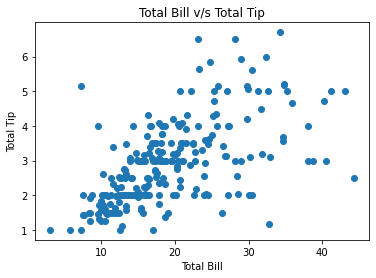

In [16]:
plt.scatter(data['total_bill'], data['tip'])
plt.title('Total Bill v/s Total Tip')
plt.xlabel('Total Bill')
plt.ylabel('Total Tip')
plt.show()

In [18]:
# set numeric_only parameter to True to avoid calculating the mean of non-numeric columns
data.groupby(['size']).mean(numeric_only=True)



,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,21.899722,3.206667
4,27.137647,3.814706
5,30.068000,4.028000
6,30.383333,5.300000


In [19]:
data.groupby(['time']).mean(numeric_only=True)



,total_bill,tip,size
time,,,
Dinner,19.882059,2.966235,2.582353
Lunch,17.168676,2.728088,2.411765


In [20]:
data.groupby(['day']).mean(numeric_only=True)



,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,19.175542,2.736024,2.457831
Sun,20.724865,3.228243,2.797297
Thur,17.682742,2.771452,2.451613


In [24]:
le = LabelEncoder()

for col in data.columns:
    
    if data[col].dtype == object:
        data[col] = le.fit_transform(data[col])

data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


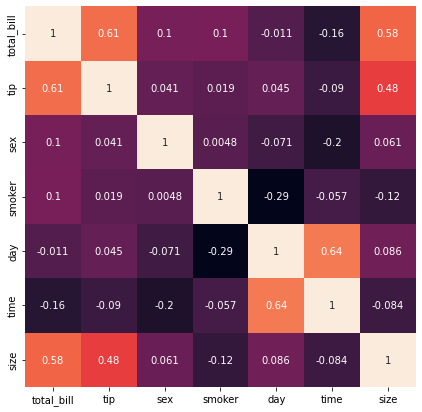

In [25]:
plt.figure(figsize=(7,7))
sb.heatmap(data.corr() , annot = True, cbar = False)
plt.show()

In [26]:
features = data.drop("tip", axis=1)

target = data['tip']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=42)

In [27]:
X_train.shape, X_val.shape

((190, 6), (48, 6))

In [28]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)

In [30]:
models =[LinearRegression(), XGBRegressor(), RandomForestRegressor(), AdaBoostRegressor()]

for i in range(4):
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i]}: ')
    pred_train = models[i].predict(X_train)
    print("Training Accuracy :", mae(Y_train, pred_train))
    
    pred_val = models[i].predict(X_val)
    print("Validation Accuracy: ", mae(Y_val, pred_val))
    
    print()

LinearRegression(): 
Training Accuracy : 0.7135330693490977
Validation Accuracy:  0.691467833137434

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...): 
Training Accuracy : 0.01949277340738397
Validation Accuracy:  0.7518184167146683

RandomForestRegressor(): 
Training Accuracy : 0.28565631578947376
Va